# Comparing survival curves
This example come from the SNO18 poster presented by VAXIMM in PD-L1lo and PD-L1hi groups.

In [1]:
import lifelines
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from lifelines import KaplanMeierFitter

In [3]:
data=pd.DataFrame({'T': [111,861,778,839,227,250,161,566],
                  'E': [1,0,1,0,1,1,1,0],
                 'pat': [2601,2702,2704,2605,2706,2607,2708,2714],
                 'PD-L1_increase': [True,False,False,False,True,True,True,True]})

In [4]:
data

,T,E,pat,PD-L1_increase
0,111,1,2601,True
1,861,0,2702,False
2,778,1,2704,False
3,839,0,2605,False
4,227,1,2706,True
5,250,1,2607,True
6,161,1,2708,True
7,566,0,2714,True


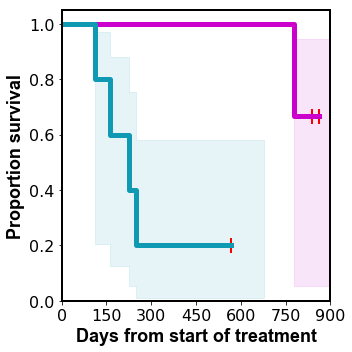

In [5]:
ix = data['PD-L1_increase'] == True

kmf_PDL1 = KaplanMeierFitter()

plt.rcParams["figure.figsize"] = (5,5)

kmf_PDL1.fit(data['T'][~ix], data['E'][~ix])
ax=kmf_PDL1.plot(legend=None, show_censors=True, ci_alpha=.1, lw=5, c="#CC00CC",
              censor_styles={'marker':'|', 'ms': 15, 'mew':2, 'markerfacecolor':'red', 
                             'markeredgecolor': 'red'})

kmf_PDL1.fit(data['T'][ix], data['E'][ix])
kmf_PDL1.plot(ax=ax, legend=None, show_censors=True, ci_alpha=.1, lw=5, c="#0F99B2",
              censor_styles={'marker':'|', 'ms': 15, 'mew':2, 'markerfacecolor':'red', 
                             'markeredgecolor': 'red'},)

plt.ylabel('Proportion survival', fontdict={'fontname':'arial', 'size': 18, 'weight': 'bold'})
plt.ylim([0,1.05])
plt.yticks(fontsize=16)
plt.xlim([0, 900])
plt.xticks([0,150, 300, 450, 600, 750, 900], fontsize=16)
plt.setp(ax.spines.values(), linewidth=2)
plt.xlabel('Days from start of treatment', fontdict={'fontname':'arial',
                                                     'size': 18, 'weight': 'bold'})

plt.tight_layout()
plt.savefig('survival_pdl1.svg');

In [6]:
from lifelines.statistics import logrank_test

In [7]:
results = logrank_test(data['T'][ix], data['T'][~ix], data['E'][ix], data['E'][~ix], alpha=.95)

results.print_summary()


t_0=-1, alpha=0.95, null_distribution=chi squared, df=1

test_statistic      p   
        3.7385 0.0532  .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
